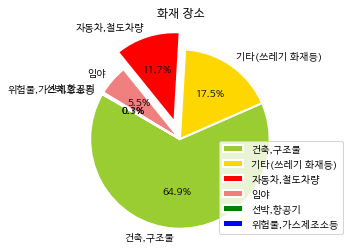

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

path = '/Windows/Fonts/Hancom Gothic Regular.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
#print(font_name)
plt.rc('font', family=font_name)

%matplotlib inline

mpl.rcParams['axes.unicode_minus'] = False

file_path = 'C:/Users/paris/Desktop/fire/소방청_연간화재통계_20191231.csv'
fire = pd.read_csv(file_path, sep=',', encoding='euc-kr')

count = fire['화재유형'].value_counts()

labels, sizes = list(), list()
for quz, val in count.items():
    labels.append(quz)
    sizes.append(val)
    
colors = ['yellowgreen', 'gold', 'r', 'lightcoral', "green", "blue", "violet", "lightskyblue", "black"]
explode = (0, 0, 0.3, 0, 0, 0)
wedgeprops={'width': 1.5, 'edgecolor': 'w', 'linewidth': 2}

plt.title('화재 장소')
plt.pie(sizes, labels=labels, colors=colors, explode=explode, 
        startangle = 150, autopct='%1.1f%%', wedgeprops=wedgeprops, radius=1.5)

mpl.rcParams['font.size'] = 12

plt.legend(loc='lower right', prop={'size': 10})
plt.axis('equal')
plt.show()


In [27]:
file_path = 'C:/Users/paris/Desktop/fire/소방청_전국 취약계층 주택용 소방시설 보급 현황_20181231.csv'
fire = pd.read_csv(file_path, sep=',', encoding='euc-kr')

In [36]:
fire.info
fire.head(20)
fire.describe()

,총 보급대상 가구수,보급 가구수,보급률
count,17.000000,17.000000,17.000000
mean,63990.235294,35275.647059,64.176471
std,59023.240350,24776.819603,17.011890
min,1797.000000,1304.000000,43.000000
25%,28997.000000,21205.000000,52.000000
50%,53592.000000,33206.000000,60.000000
75%,70388.000000,41069.000000,79.000000
max,211053.000000,96911.000000,96.000000


In [37]:
fire_count = fire.groupby('구분')['보급률'].sum()
fire_count

구분
강원    79
경기    43
경남    55
경북    52
광주    62
대구    79
대전    93
부산    50
서울    46
세종    73
울산    86
인천    53
전남    64
전북    60
제주    96
충남    54
충북    46
Name: 보급률, dtype: int64

In [44]:
s=fire_count.sort_values(ascending= False)
s

구분
제주    96
대전    93
울산    86
강원    79
대구    79
세종    73
전남    64
광주    62
전북    60
경남    55
충남    54
인천    53
경북    52
부산    50
충북    46
서울    46
경기    43
Name: 보급률, dtype: int64

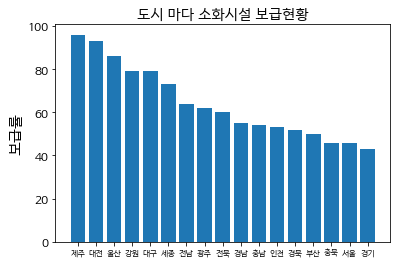

In [66]:
fire_name_list = s.index.tolist() # 리스트 타입으로 변형
x_pos = np.arange(len(fire_name_list)) # 50개

fire_cnt = s.values.tolist()

xlabel = ['제주', '대전', '울산','강원', '대구', '세종', '전남', '광주', '전북', '경남', 
          '충남', '인천', '경북', '부산', '충북', '서울', '경기']
plt.bar(x_pos, fire_cnt, align='center') #막대기가 중앙에 있길 원하는 것
plt.xticks(x_pos, xlabel, fontsize =8)
plt.title('도시 마다 소화시설 보급현황')
plt.ylabel('보급률', fontsize= 15)
plt.show()

In [71]:
file_path = 'C:/Users/paris/Desktop/fire/소방청_화재발생 주소정보_20171231.csv'
fire = pd.read_csv(file_path, sep=',', encoding='euc-kr')

In [74]:
fire.info
fire.columns

Index(['연번', '조사서번호', '사망', '부상', '인명피해(명)소계', '재산피해소계', '시도본부', '소방서',
       '119안전센터', '119지역대',
       ...
       '방화셔터', '방화문', '방화구획여부', '방화동기', '지번동', '지번리', '그을음면적', '차량발화지점',
       '위험물_가스제조소등_발화지점', '선박항공기구분'],
      dtype='object', length=184)